# Checkout Data Analysis

This notebook analyzes checkout data from two CSV files (`checkout_1.csv` and `checkout_2.csv`).

We will:
- Load the data
- Run some SQL queries using pandasql
- Visualize anomalies in sales trends


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load datasets
checkout1 = pd.read_csv('../data/checkout_1.csv')
checkout2 = pd.read_csv('../data/checkout_2.csv')

checkout1.head(), checkout2.head()

(  time  today  yesterday  same_day_last_week  avg_last_week  avg_last_month
 0  00h      9         12                  11           6.42            4.85
 1  01h      3          5                   1           1.85            1.92
 2  02h      1          0                   0           0.28            0.82
 3  03h      1          0                   0           0.42            0.46
 4  04h      0          0                   1           0.42            0.21,
   time  today  yesterday  same_day_last_week  avg_last_week  avg_last_month
 0  00h      6          9                   5           5.00            4.92
 1  01h      3          3                   2           2.00            1.92
 2  02h      3          1                   2           0.42            0.75
 3  03h      0          1                   1           0.42            0.46
 4  04h      0          0                   0           0.14            0.21)

In [9]:
# Save to SQLite for SQL queries
conn = sqlite3.connect(':memory:')
checkout1.to_sql('checkout1', conn, index=False, if_exists='replace')
checkout2.to_sql('checkout2', conn, index=False, if_exists='replace')

query = """
SELECT time, today, yesterday, avg_last_week, avg_last_month
FROM checkout1
WHERE today > (avg_last_week * 2)
ORDER BY time;
"""

pd.read_sql(query, conn)

,time,today,yesterday,avg_last_week,avg_last_month
0,02h,1,0,0.28,0.82
1,03h,1,0,0.42,0.46
2,17h,45,30,20.42,22.28


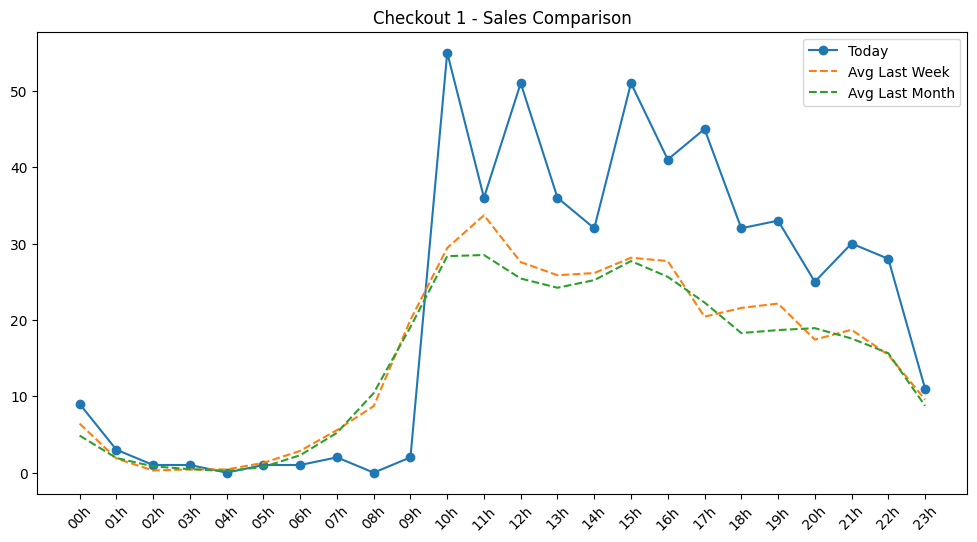

In [10]:
# Plot anomalies for checkout1
plt.figure(figsize=(12,6))
plt.plot(checkout1['time'], checkout1['today'], label='Today', marker='o')
plt.plot(checkout1['time'], checkout1['avg_last_week'], label='Avg Last Week', linestyle='--')
plt.plot(checkout1['time'], checkout1['avg_last_month'], label='Avg Last Month', linestyle='--')
plt.xticks(rotation=45)
plt.legend()
plt.title('Checkout 1 - Sales Comparison')
plt.show()

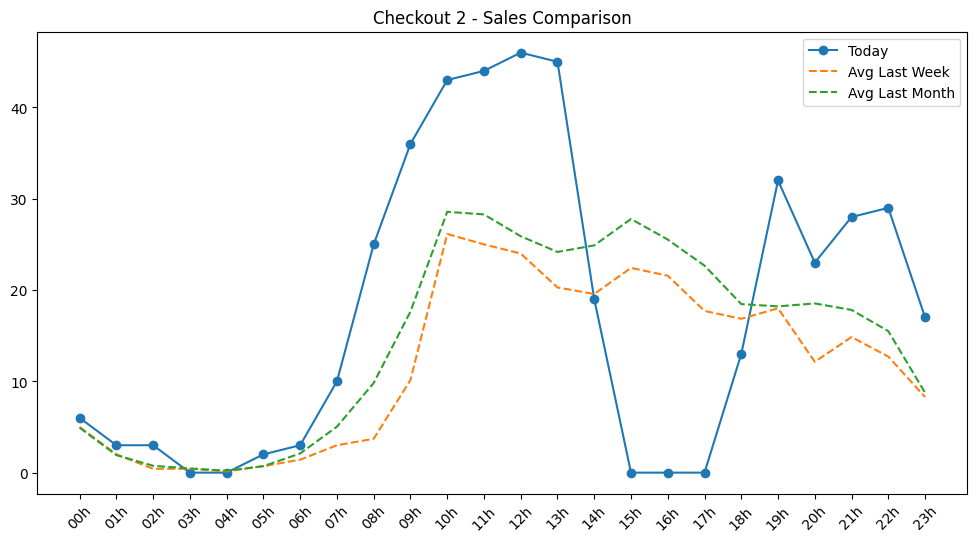

In [11]:
# Plot anomalies for checkout2
plt.figure(figsize=(12,6))
plt.plot(checkout2['time'], checkout2['today'], label='Today', marker='o')
plt.plot(checkout2['time'], checkout2['avg_last_week'], label='Avg Last Week', linestyle='--')
plt.plot(checkout2['time'], checkout2['avg_last_month'], label='Avg Last Month', linestyle='--')
plt.xticks(rotation=45)
plt.legend()
plt.title('Checkout 2 - Sales Comparison')
plt.show()